# FMO Complex Model Examples

### Mean Field calculations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qc_lab import Simulation # import simulation class 
from qc_lab.models import FMOComplex # import model class 
from qc_lab.algorithms import MeanField # import algorithm class 
from qc_lab.dynamics import serial_driver # import dynamics driver


100%|██████████| 3001/3001 [00:16<00:00, 178.13it/s]


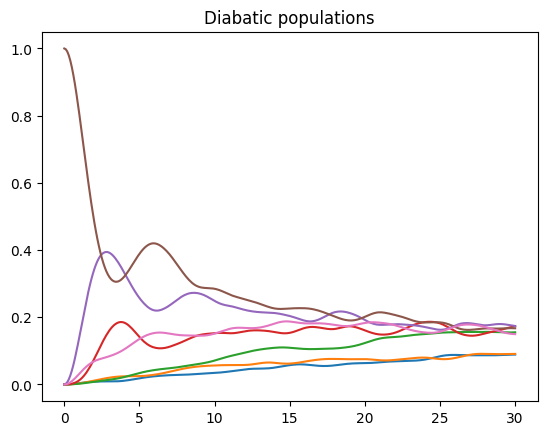

In [2]:

sim = Simulation()

sim.settings.num_trajs = 200
sim.settings.batch_size = 50
sim.settings.tmax = 30
sim.settings.dt = 0.01

sim.model = FMOComplex({
    "kBT": 1,
    "boson_mass": 1,
    "l_reorg": 35 * 0.00509506, # reorganization energy
    "W": 106.14 * 0.00509506, # characteristic frequency
    "A": 200,
})
sim.algorithm = MeanField()

sim.state.wf_db= np.zeros((sim.model.constants.num_quantum_states), dtype=complex)
sim.state.wf_db[5] += 1.0

data = serial_driver(sim)

plt.plot(sim.settings.tdat_output, np.real(np.einsum('tii->ti',data.data_dict['dm_db'])))
plt.title('Diabatic populations')
plt.show()

### Surface Hopping Calculations

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qc_lab import Simulation # import simulation class 
from qc_lab.models import FMOComplex # import model class 
from qc_lab.algorithms import FewestSwitchesSurfaceHopping # import algorithm class 
from qc_lab.dynamics import serial_driver # import dynamics driver

#### Stochastic sampling

100%|██████████| 3001/3001 [00:24<00:00, 123.03it/s]


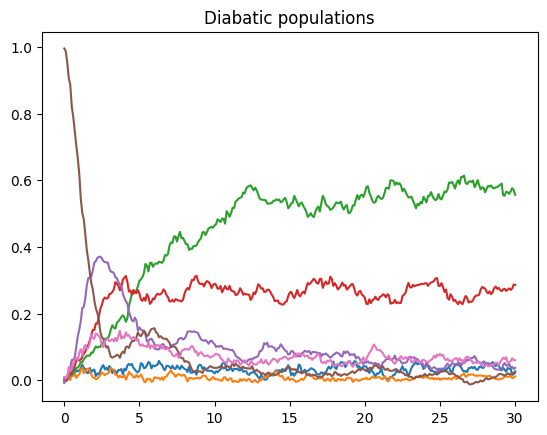

In [4]:
sim = Simulation()

sim.settings.num_trajs = 200
sim.settings.batch_size = 50
sim.settings.tmax = 30
sim.settings.dt = 0.01

sim.model = FMOComplex({
    "kBT": 1,
    "boson_mass": 1,
    "l_reorg": 35 * 0.00509506, # reorganization energy
    "W": 106.14 * 0.00509506, # characteristic frequency
    "A": 200,
})
sim.algorithm = FewestSwitchesSurfaceHopping({
    'fssh_deterministic':False,
    'gauge_fixing':0
})

sim.state.wf_db= np.zeros((sim.model.constants.num_quantum_states), dtype=complex)
sim.state.wf_db[5] += 1.0

data = serial_driver(sim)

plt.plot(sim.settings.tdat_output, np.real(np.einsum('tii->ti',data.data_dict['dm_db'])))
plt.title('Diabatic populations')
plt.show()

#### Deterministic sampling

To use deterministic sampling we multiply the number of trajectories and batch size by the number of states. Note that the convergence behavior changes.

100%|██████████| 3001/3001 [00:23<00:00, 126.90it/s]


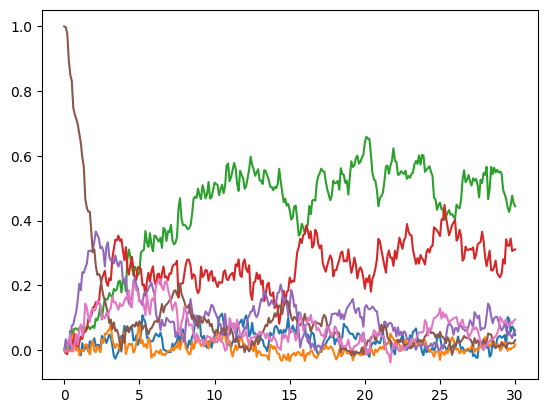

In [5]:
sim = Simulation()

sim.settings.num_trajs = 20*7
sim.settings.batch_size = 5*7
sim.settings.tmax = 30
sim.settings.dt = 0.01

sim.model = FMOComplex({
    "kBT": 1,
    "boson_mass": 1,
    "l_reorg": 35 * 0.00509506, # reorganization energy
    "W": 106.14 * 0.00509506, # characteristic frequency
    "A": 200,
})
sim.algorithm = FewestSwitchesSurfaceHopping({
    'fssh_deterministic':True,
    'gauge_fixing':0
})

sim.state.wf_db= np.zeros((sim.model.constants.num_quantum_states), dtype=complex)
sim.state.wf_db[5] += 1.0

data = serial_driver(sim)

plt.plot(sim.settings.tdat_output, np.real(np.einsum('tii->ti',data.data_dict['dm_db'])))
plt.show()

### Using a parllel driver

We will parallelize the above deterministic surface hopping calculation over four tasks.

100%|██████████| 3001/3001 [00:41<00:00, 72.38it/s] 


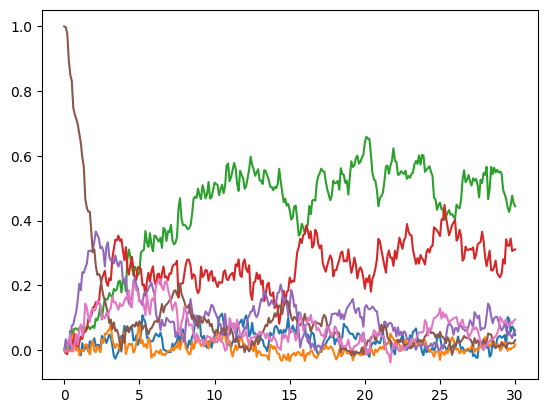

In [6]:
from qc_lab.dynamics import parallel_driver_multiprocessing # import dynamics driver

sim = Simulation()

sim.settings.num_trajs = 20*7
sim.settings.batch_size = 5*7
sim.settings.tmax = 30
sim.settings.dt = 0.01

sim.model = FMOComplex({
    "kBT": 1,
    "boson_mass": 1,
    "l_reorg": 35 * 0.00509506, # reorganization energy
    "W": 106.14 * 0.00509506, # characteristic frequency
    "A": 200,
})
sim.algorithm = FewestSwitchesSurfaceHopping({
    'fssh_deterministic':True,
    'gauge_fixing':0
})

sim.state.wf_db= np.zeros((sim.model.constants.num_quantum_states), dtype=complex)
sim.state.wf_db[5] += 1.0

data = parallel_driver_multiprocessing(sim, num_tasks=4)

plt.plot(sim.settings.tdat_output, np.real(np.einsum('tii->ti',data.data_dict['dm_db'])))
plt.show()